In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import random

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [134]:
#Import data
df=pd.read_csv("day.csv")
df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [135]:
#Check the number of records and features
df.shape

(730, 16)

In [136]:
#Check the summary of numeric columns
df.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.995890   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.000339   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.690411    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.462641    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [137]:
#Check the null value count and datatype of features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### Above info tells us that there are no null values and the features like season, month,weekday etc.. are being interpreted as numerical values. So that should be changed.

In [138]:
#Convert values of season feature 1:spring, 2:summer, 3:fall, 4:winter
def convert_val(x):
    if x==1:
        return 'spring'
    elif x==2:
        return 'summer'
    elif x==3:
        return 'fall'
    else:
        return 'winter'

In [139]:
df['season']=df['season'].apply(convert_val)

In [140]:
#check the data type of season
df.season.dtype

dtype('O')

In [141]:
#Converting the values for other categorical features using map function
df['mnth']=df.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
df['weathersit']=df.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
df['weekday']=df.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

In [142]:
#Convert datatype of dteday to date
df.dteday=pd.to_datetime(df.dteday)

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

## Visualization

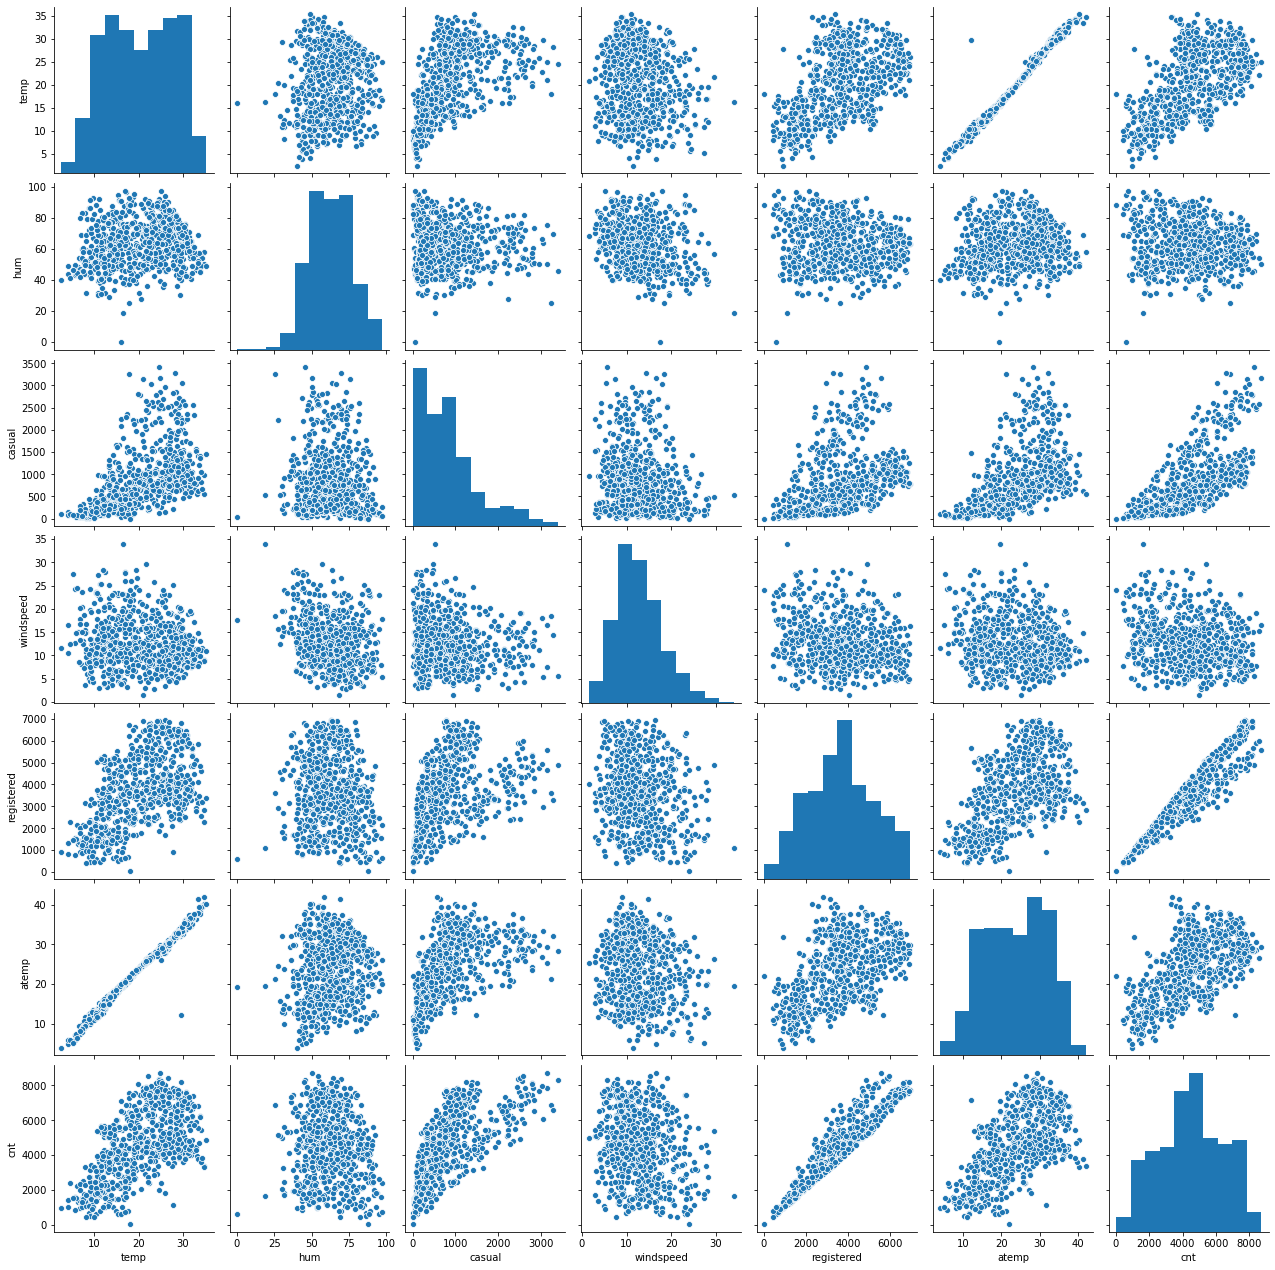

In [144]:
#Visualising Numeric Variables
sns.pairplot(df,vars=["temp","hum","casual","windspeed","registered","atemp","cnt"])
plt.show()

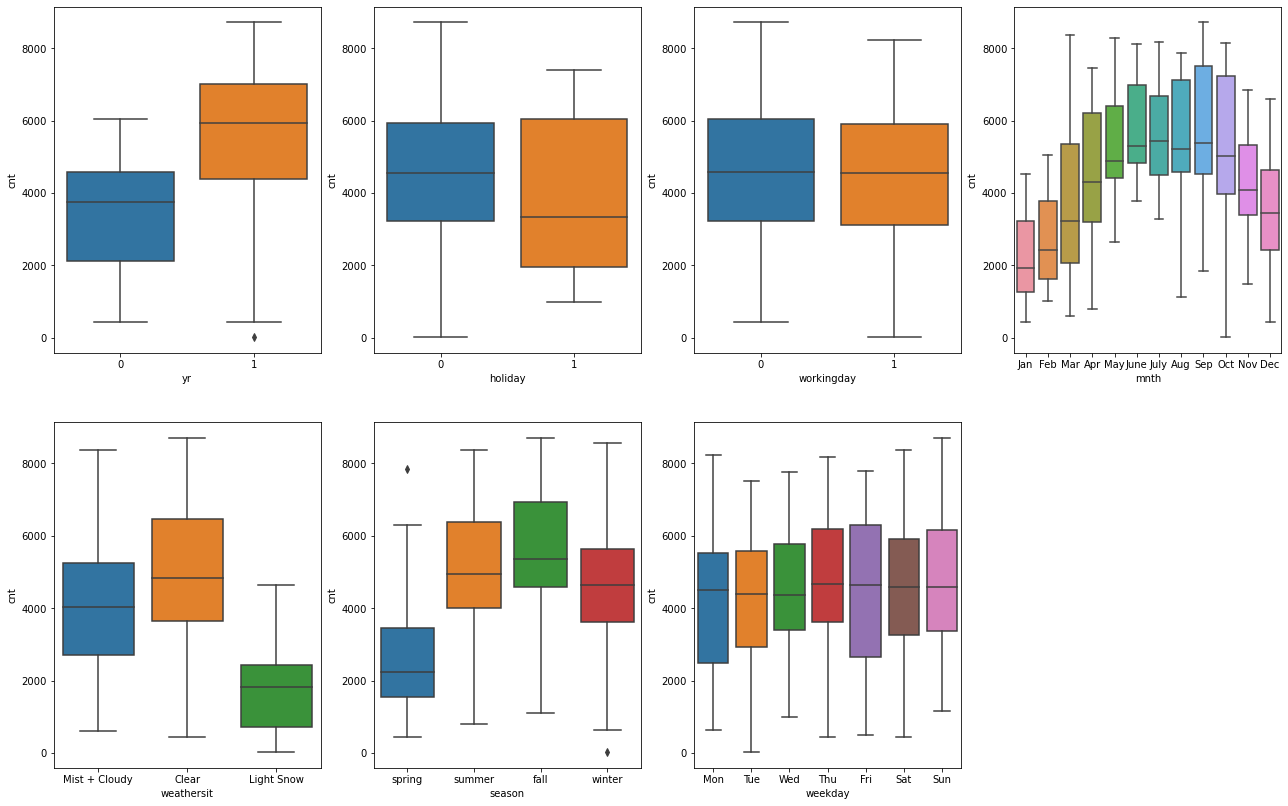

In [145]:
plt.figure(figsize=(22, 14))
plt.subplot(2,4,1)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(2,4,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,4,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(2,4,4)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,4,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,4,6)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,4,7)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.show()

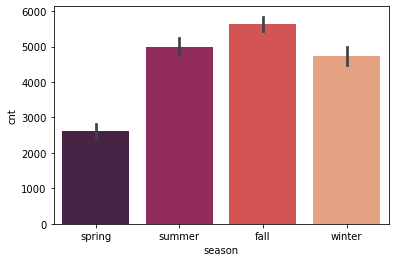

In [146]:
#barplot to see relation between season and count of bike rentals
sns.barplot('season','cnt',data=df,palette="rocket",)
plt.show()

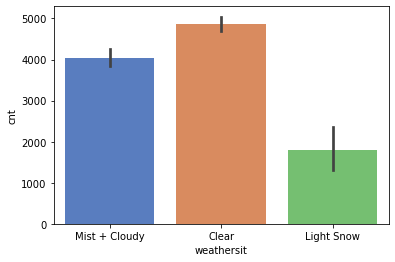

In [147]:
sns.barplot("weathersit","cnt",palette="muted",data=df)
plt.show()

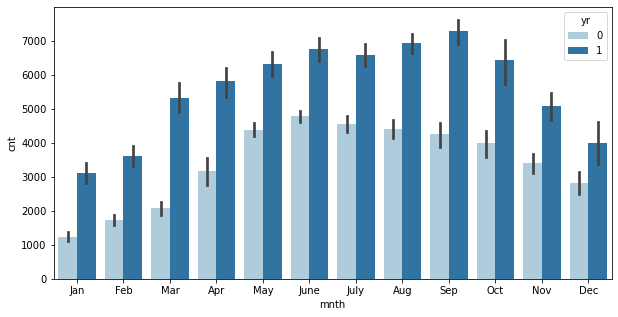

In [148]:
plt.figure(figsize=(10,5))
sns.barplot("mnth","cnt",hue="yr",data=df,palette="Paired")
plt.show()

- As mentioned in the problem statement cnt values are high in 2019 than in 2018.
- September month logged highest count. Months March and Octoer has great spread in data. May, June, July seems to be the months that will generate high counts.
- As intuition suggests count is high when weather is clear and low when it is snowing
- Spring season has the low count and fall has the high count
- Among the days of the week the difference is not extreme.

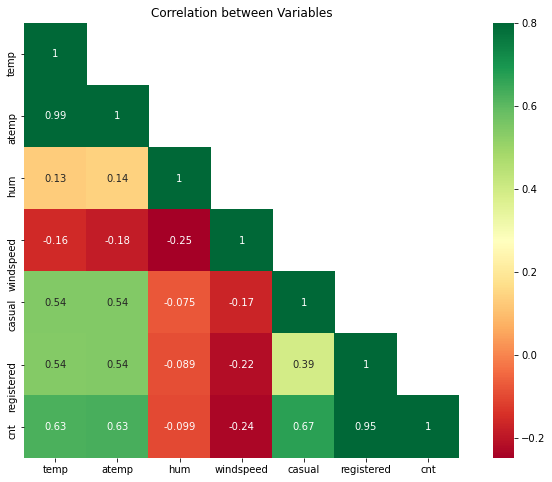

In [149]:
mask = np.array(df[['temp','atemp','hum','windspeed','casual','registered','cnt']].corr())
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(12,8)
sns.heatmap(df[['temp','atemp','hum','windspeed','casual','registered','cnt']].corr(),cmap="RdYlGn", mask=mask, vmax=0.8, square=True, annot=True);
plt.title("Correlation between Variables")
plt.show()

- The pairplot and heatmap shows that the variables temp, atemp, casual, registeres are correlated with count. So, linear regression can be used.
-----------

#### Drop unwanted features

In [150]:
#drop unnecessary columns
df=df.drop(["instant","dteday","casual","registered","atemp"],axis=1)
df.head()

season  yr mnth  holiday weekday  workingday     weathersit       temp  \
0  spring   0  Jan        0     Mon           1  Mist + Cloudy  14.110847   
1  spring   0  Jan        0     Tue           1  Mist + Cloudy  14.902598   
2  spring   0  Jan        0     Wed           1          Clear   8.050924   
3  spring   0  Jan        0     Thu           1          Clear   8.200000   
4  spring   0  Jan        0     Fri           1          Clear   9.305237   

       hum  windspeed   cnt  
0  80.5833  10.749882   985  
1  69.6087  16.652113   801  
2  43.7273  16.636703  1349  
3  59.0435  10.739832  1562  
4  43.6957  12.522300  1600

#### Creat dummy variables

In [151]:
# Select all categorical variables
df_categorical = df.select_dtypes(include=['object'])
df_categorical.columns

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')

In [152]:
# convert categorical values into dummies
df_dummies = pd.get_dummies(df_categorical,drop_first=True)
df_dummies.head()

season_spring  season_summer  season_winter  mnth_Aug  mnth_Dec  mnth_Feb  \
0              1              0              0         0         0         0   
1              1              0              0         0         0         0   
2              1              0              0         0         0         0   
3              1              0              0         0         0         0   
4              1              0              0         0         0         0   

   mnth_Jan  mnth_July  mnth_June  mnth_Mar  ...  mnth_Oct  mnth_Sep  \
0         1          0          0         0  ...         0         0   
1         1          0          0         0  ...         0         0   
2         1          0          0         0  ...         0         0   
3         1          0          0         0  ...         0         0   
4         1          0          0         0  ...         0         0   

   weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thu  weekday_Tue  \
0            1            0            0            0            0   
1            0            0            0            0            1   
2            0            0            0            0            0   
3            0            0            0            1            0   
4            0            0            0            0            0   

   weekday_Wed  weathersit_Light Snow  weathersit_Mist + Cloudy  
0            0                      0                         1  
1            0                      0                         1  
2            1                      0                         0  
3            0                      0                         0  
4            0                      0                         0  

[5 rows x 22 columns]

In [153]:
list(df_categorical.columns)
df = df.drop(list(df_categorical.columns),axis=1)
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt'], dtype='object')

In [154]:
df = pd.concat([df, df_dummies], axis=1)
df.head()

yr  holiday  workingday       temp      hum  windspeed   cnt  \
0   0        0           1  14.110847  80.5833  10.749882   985   
1   0        0           1  14.902598  69.6087  16.652113   801   
2   0        0           1   8.050924  43.7273  16.636703  1349   
3   0        0           1   8.200000  59.0435  10.739832  1562   
4   0        0           1   9.305237  43.6957  12.522300  1600   

   season_spring  season_summer  season_winter  ...  mnth_Oct  mnth_Sep  \
0              1              0              0  ...         0         0   
1              1              0              0  ...         0         0   
2              1              0              0  ...         0         0   
3              1              0              0  ...         0         0   
4              1              0              0  ...         0         0   

   weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thu  weekday_Tue  \
0            1            0            0            0            0   
1            0            0            0            0            1   
2            0            0            0            0            0   
3            0            0            0            1            0   
4            0            0            0            0            0   

   weekday_Wed  weathersit_Light Snow  weathersit_Mist + Cloudy  
0            0                      0                         1  
1            0                      0                         1  
2            1                      0                         0  
3            0                      0                         0  
4            0                      0                         0  

[5 rows x 29 columns]

In [155]:
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_July', 'mnth_June',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'weathersit_Light Snow',
       'weathersit_Mist + Cloudy'],
      dtype='object')

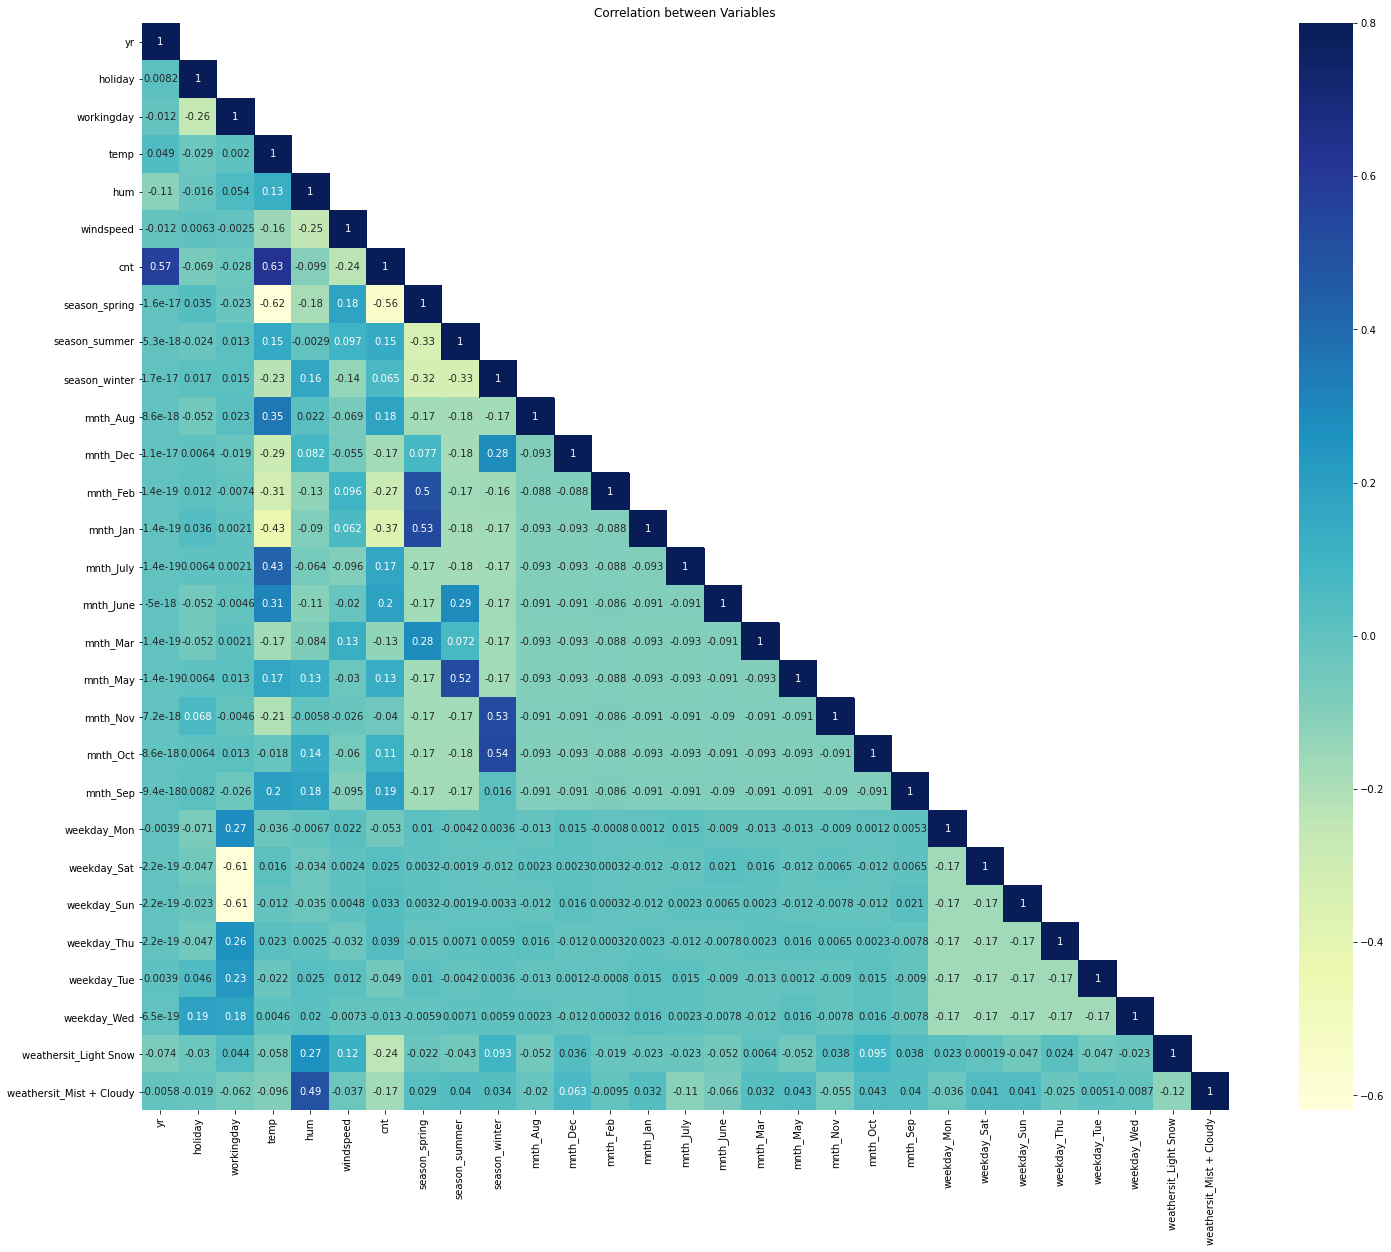

In [156]:
#Now lets check the correlation between variables again
#heatmap to see correlation between variables
#

mask = np.array(df.corr())
mask[np.tril_indices_from(mask)] = False
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),cmap="YlGnBu", mask=mask, vmax=0.8, square=True, annot=True);
plt.title("Correlation between Variables")
plt.show()

#### Split the dataset

In [157]:
#splitting the data into Training and Testing Sets
df_train,df_test=train_test_split(df,train_size=0.7,random_state=100)

In [158]:
print(df_train.shape,df_test.shape)

(510, 29) (220, 29)


#### Scaling


In [159]:
scaler=MinMaxScaler()
num_vars=["temp","hum","windspeed","cnt"]
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])
df_train.head()

yr  holiday  workingday      temp       hum  windspeed       cnt  \
576   1        0           1  0.815169  0.725633   0.264686  0.827658   
426   1        0           0  0.442393  0.640189   0.255342  0.465255   
728   1        0           1  0.245101  0.498067   0.663106  0.204096   
482   1        0           0  0.395666  0.504508   0.188475  0.482973   
111   0        0           0  0.345824  0.751824   0.380981  0.191095   

     season_spring  season_summer  season_winter  ...  mnth_Oct  mnth_Sep  \
576              0              0              0  ...         0         0   
426              1              0              0  ...         0         0   
728              1              0              0  ...         0         0   
482              0              1              0  ...         0         0   
111              0              1              0  ...         0         0   

     weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thu  weekday_Tue  \
576            0            0            0            0            0   
426            0            0            1            0            0   
728            1            0            0            0            0   
482            0            0            1            0            0   
111            0            0            1            0            0   

     weekday_Wed  weathersit_Light Snow  weathersit_Mist + Cloudy  
576            1                      0                         0  
426            0                      0                         1  
728            0                      0                         0  
482            0                      0                         1  
111            0                      0                         1  

[5 rows x 29 columns]

In [160]:
y_train=df_train.pop("cnt")
X_train=df_train

#### Building a model

In [161]:
#Using RFE for feature selection
lm=LinearRegression()
lm.fit(X_train,y_train)
rfe=RFE(lm,15)
rfe=rfe.fit(X_train,y_train)

In [162]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 9),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 2),
 ('mnth_Jan', True, 1),
 ('mnth_July', True, 1),
 ('mnth_June', False, 11),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 8),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 12),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 7),
 ('weekday_Sat', False, 4),
 ('weekday_Sun', False, 5),
 ('weekday_Thu', False, 13),
 ('weekday_Tue', False, 6),
 ('weekday_Wed', False, 10),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist + Cloudy', True, 1)]

In [163]:
#Columns where RFE support is True
columns=X_train.columns[rfe.support_]
columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Dec', 'mnth_Jan', 'mnth_July',
       'mnth_Nov', 'mnth_Sep', 'weathersit_Light Snow',
       'weathersit_Mist + Cloudy'],
      dtype='object')

In [164]:
#Columns where RFE support is FAlSE
X_train.columns[~rfe.support_]
#Create X_test dataFrame with RFE selected variables
X_train_rfe=X_train[columns]

In [165]:
#Adding a constant variables
X_train_rfe=sm.add_constant(X_train_rfe)

In [166]:
#Running the linear model
lm=sm.OLS(y_train,X_train_rfe).fit()

In [167]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          8.15e-189
Time:                        12:19:04   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

##### We can see that for all the features P value is less than 0.05. So check the VIF

####  VIF:

In [168]:
#Drop the Constant term
X_train_rfe=X_train_rfe.drop(["const"],axis=1)

In [169]:
#Calculate the VIFs for the new model
vif=pd.DataFrame()
X=X_train_rfe
vif["Features"]=X.columns
vif["VIF"]=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
vif["VIF"]=round(vif["VIF"],2)
vif=vif.sort_values(by="VIF",ascending=False)
print(vif)

                    Features    VIF
3                        hum  30.89
2                       temp  17.79
4                  windspeed   4.72
5              season_spring   4.37
7              season_winter   4.06
6              season_summer   2.82
14  weathersit_Mist + Cloudy   2.32
0                         yr   2.09
11                  mnth_Nov   1.85
9                   mnth_Jan   1.75
10                 mnth_July   1.59
8                   mnth_Dec   1.56
12                  mnth_Sep   1.41
13     weathersit_Light Snow   1.28
1                    holiday   1.06


In [170]:
#Drop feature hum as it's VIF is very high
X_train_new1=X_train_rfe.drop(["hum"],axis=1)

In [171]:
#Build model
X_train_lm1=sm.add_constant(X_train_new1)
lm1=sm.OLS(y_train,X_train_lm1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          4.75e-186
Time:                        12:19:05   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [172]:
#Drop the Constant Term
X_train_lm1=X_train_lm1.drop(["const"],axis=1)

In [173]:
#calculating the VIFs for the new model
vif=pd.DataFrame()
X=X_train_new1
vif["Features"]=X.columns
vif["VIF"]=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
vif["VIF"]=round(vif["VIF"],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

Features   VIF
2                       temp  5.17
3                  windspeed  4.67
6              season_winter  2.95
4              season_spring  2.89
5              season_summer  2.24
0                         yr  2.07
10                  mnth_Nov  1.81
8                   mnth_Jan  1.66
9                  mnth_July  1.59
13  weathersit_Mist + Cloudy  1.57
7                   mnth_Dec  1.47
11                  mnth_Sep  1.35
12     weathersit_Light Snow  1.09
1                    holiday  1.06

In [174]:
#Drop temp as it's VIF is >5
X_train_new2=X_train_lm1.drop(["temp"],axis=1)

#Build a model
X_train_lm2=sm.add_constant(X_train_new2)
lm2=sm.OLS(y_train,X_train_lm2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     144.9
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          1.82e-159
Time:                        12:19:05   Log-Likelihood:                 438.84
No. Observations:                 510   AIC:                            -849.7
Df Residuals:                     496   BIC:                            -790.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [175]:
#Drop the constant
X_train_lm2=X_train_lm2.drop(["const"],axis=1)

In [176]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                  windspeed  3.89
3              season_spring  2.89
5              season_winter  2.85
4              season_summer  2.02
0                         yr  1.83
9                   mnth_Nov  1.80
7                   mnth_Jan  1.64
12  weathersit_Mist + Cloudy  1.53
6                   mnth_Dec  1.46
8                  mnth_July  1.20
10                  mnth_Sep  1.18
11     weathersit_Light Snow  1.09
1                    holiday  1.06

In [177]:
#Drop feature mnth_July as it is insignificant
X_train_new3=X_train_lm2.drop(['mnth_July'],axis=1)

In [178]:
# Adding a constant variable 
X_train_lm3 = sm.add_constant(X_train_new3)
lm3 = sm.OLS(y_train,X_train_lm3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     157.0
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          2.08e-160
Time:                        12:19:06   Log-Likelihood:                 438.45
No. Observations:                 510   AIC:                            -850.9
Df Residuals:                     497   BIC:                            -795.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [179]:
#Drop constant 
X_train_lm3=X_train_lm3.drop(['const'],axis=1)

In [180]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                  windspeed  3.52
5              season_winter  2.75
3              season_spring  2.71
4              season_summer  1.87
8                   mnth_Nov  1.80
0                         yr  1.77
7                   mnth_Jan  1.64
11  weathersit_Mist + Cloudy  1.52
6                   mnth_Dec  1.46
9                   mnth_Sep  1.16
10     weathersit_Light Snow  1.09
1                    holiday  1.06

In [181]:
#drop Season_winter as it is insignificant
X_train_new4=X_train_lm3.drop(["season_winter"],axis=1)

In [182]:
#Build a model
X_train_lm4= sm.add_constant(X_train_new4)
lm4= sm.OLS(y_train,X_train_lm4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     171.2
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          2.71e-161
Time:                        12:19:06   Log-Likelihood:                 437.88
No. Observations:                 510   AIC:                            -851.8
Df Residuals:                     498   BIC:                            -800.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [183]:
#Drop Constant
X_train_lm4=X_train_lm4.drop(["const"],axis=1)

In [184]:
#Calculate the VIFS  for the new model
vif = pd.DataFrame()
X = X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                  windspeed  3.23
3              season_spring  2.37
0                         yr  1.74
4              season_summer  1.70
6                   mnth_Jan  1.62
10  weathersit_Mist + Cloudy  1.48
7                   mnth_Nov  1.23
8                   mnth_Sep  1.16
5                   mnth_Dec  1.13
9      weathersit_Light Snow  1.07
1                    holiday  1.06

#### This is a good model as all the features are significant and at the same time VIF is <5 for all the features and it has R-Squ 0.791. This model can be used for predictions.

In [185]:
#Add constant
X_train_lm4=sm.add_constant(X_train_lm4)
X_train_lm4

const  yr  holiday  windspeed  season_spring  season_summer  mnth_Dec  \
576    1.0   1        0   0.264686              0              0         0   
426    1.0   1        0   0.255342              1              0         0   
728    1.0   1        0   0.663106              1              0         1   
482    1.0   1        0   0.188475              0              1         0   
111    1.0   0        0   0.380981              0              1         0   
..     ...  ..      ...        ...            ...            ...       ...   
578    1.0   1        0   0.187140              0              0         0   
53     1.0   0        0   0.111379              1              0         0   
350    1.0   0        0   0.431816              0              0         1   
79     1.0   0        0   0.529881              0              1         0   
520    1.0   1        0   0.359599              0              1         0   

     mnth_Jan  mnth_Nov  mnth_Sep  weathersit_Light Snow  \
576         0         0         0                      0   
426         0         0         0                      0   
728         0         0         0                      0   
482         0         0         0                      0   
111         0         0         0                      0   
..        ...       ...       ...                    ...   
578         0         0         0                      0   
53          0         0         0                      0   
350         0         0         0                      0   
79          0         0         0                      0   
520         0         0         0                      0   

     weathersit_Mist + Cloudy  
576                         0  
426                         1  
728                         0  
482                         1  
111                         1  
..                        ...  
578                         0  
53                          0  
350                         1  
79                          1  
520                         1  

[510 rows x 12 columns]

In [186]:
#y train predicted
y_train_pred = lm4.predict(X_train_lm4)

#### Plot the Error terms

<Figure size 432x288 with 0 Axes>

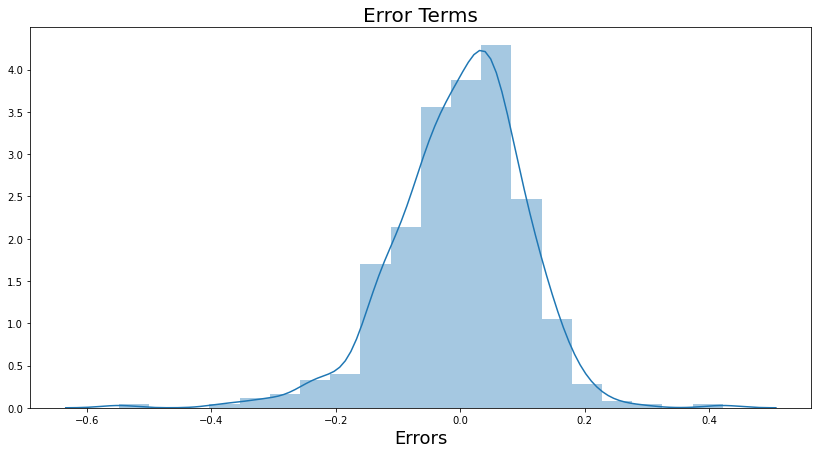

In [187]:
fig = plt.figure()
plt.figure(figsize=(14,7))
sns.distplot((y_train - y_train_pred), bins = 20)
plt.title('Error Terms', fontsize = 20)          
plt.xlabel('Errors', fontsize = 18) 
plt.show()

In [188]:
#Create a list of numeric variables
num_vars=['temp','hum','windspeed','cnt']

#Fit on data
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

yr  holiday  workingday      temp       hum  windspeed       cnt  \
184   0        1           0  0.831783  0.657364   0.084219  0.692706   
535   1        0           1  0.901354  0.610133   0.153728  0.712034   
299   0        0           0  0.511964  0.837699   0.334206  0.303382   
221   0        0           1  0.881625  0.437098   0.339570  0.547400   
152   0        0           0  0.817246  0.314298   0.537414  0.569029   

     season_spring  season_summer  season_winter  ...  mnth_Oct  mnth_Sep  \
184              0              0              0  ...         0         0   
535              0              1              0  ...         0         0   
299              0              0              1  ...         1         0   
221              0              0              0  ...         0         0   
152              0              1              0  ...         0         0   

     weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thu  weekday_Tue  \
184            0            0            0            0            0   
535            0            0            0            1            0   
299            0            1            0            0            0   
221            0            0            0            0            0   
152            0            1            0            0            0   

     weekday_Wed  weathersit_Light Snow  weathersit_Mist + Cloudy  
184            1                      0                         1  
535            0                      0                         0  
299            0                      0                         1  
221            0                      0                         0  
152            0                      0                         0  

[5 rows x 29 columns]

In [189]:
#Dividing into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test
X_test.describe()

yr     holiday  workingday        temp         hum   windspeed  \
count  220.000000  220.000000  220.000000  220.000000  220.000000  220.000000   
mean     0.481818    0.036364    0.640909    0.558718    0.638221    0.313293   
std      0.500809    0.187620    0.480828    0.233187    0.148694    0.159584   
min      0.000000    0.000000    0.000000    0.046591    0.261915   -0.042808   
25%      0.000000    0.000000    0.000000    0.355429    0.529197    0.198843   
50%      0.000000    0.000000    1.000000    0.558172    0.625590    0.300126   
75%      1.000000    0.000000    1.000000    0.755981    0.743798    0.402718   
max      1.000000    1.000000    1.000000    0.984424    1.002146    0.807474   

       season_spring  season_summer  season_winter    mnth_Aug  ...  \
count     220.000000     220.000000     220.000000  220.000000  ...   
mean        0.254545       0.263636       0.236364    0.059091  ...   
std         0.436599       0.441609       0.425817    0.236333  ...   
min         0.000000       0.000000       0.000000    0.000000  ...   
25%         0.000000       0.000000       0.000000    0.000000  ...   
50%         0.000000       0.000000       0.000000    0.000000  ...   
75%         1.000000       1.000000       0.000000    0.000000  ...   
max         1.000000       1.000000       1.000000    1.000000  ...   

         mnth_Oct    mnth_Sep  weekday_Mon  weekday_Sat  weekday_Sun  \
count  220.000000  220.000000   220.000000   220.000000   220.000000   
mean     0.086364    0.086364     0.118182     0.172727     0.154545   
std      0.281541    0.281541     0.323559     0.378873     0.362295   
min      0.000000    0.000000     0.000000     0.000000     0.000000   
25%      0.000000    0.000000     0.000000     0.000000     0.000000   
50%      0.000000    0.000000     0.000000     0.000000     0.000000   
75%      0.000000    0.000000     0.000000     0.000000     0.000000   
max      1.000000    1.000000     1.000000     1.000000     1.000000   

       weekday_Thu  weekday_Tue  weekday_Wed  weathersit_Light Snow  \
count   220.000000   220.000000   220.000000             220.000000   
mean      0.140909     0.122727     0.159091               0.027273   
std       0.348721     0.328872     0.366595               0.163248   
min       0.000000     0.000000     0.000000               0.000000   
25%       0.000000     0.000000     0.000000               0.000000   
50%       0.000000     0.000000     0.000000               0.000000   
75%       0.000000     0.000000     0.000000               0.000000   
max       1.000000     1.000000     1.000000               1.000000   

       weathersit_Mist + Cloudy  
count                220.000000  
mean                   0.318182  
std                    0.466833  
min                    0.000000  
25%                    0.000000  
50%                    0.000000  
75%                    1.000000  
max                    1.000000  

[8 rows x 28 columns]

In [190]:
#Columns
X_train_new4.columns

Index(['yr', 'holiday', 'windspeed', 'season_spring', 'season_summer',
       'mnth_Dec', 'mnth_Jan', 'mnth_Nov', 'mnth_Sep', 'weathersit_Light Snow',
       'weathersit_Mist + Cloudy'],
      dtype='object')

In [191]:
# Now let's make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new4.columns]

# Adding a constant variable 
X_test_new1 = sm.add_constant(X_test_new)
X_test_new1.head()

const  yr  holiday  windspeed  season_spring  season_summer  mnth_Dec  \
184    1.0   0        1   0.084219              0              0         0   
535    1.0   1        0   0.153728              0              1         0   
299    1.0   0        0   0.334206              0              0         0   
221    1.0   0        0   0.339570              0              0         0   
152    1.0   0        0   0.537414              0              1         0   

     mnth_Jan  mnth_Nov  mnth_Sep  weathersit_Light Snow  \
184         0         0         0                      0   
535         0         0         0                      0   
299         0         0         0                      0   
221         0         0         0                      0   
152         0         0         0                      0   

     weathersit_Mist + Cloudy  
184                         1  
535                         0  
299                         1  
221                         0  
152                         0

In [192]:
# Making predictions
y_pred = lm4.predict(X_test_new1)

In [193]:
#Evaluate R-square for test
r2_score(y_test,y_pred)

0.7790839400465187

In [194]:
#Adjusted R^2
#adj r2=1-(1-R2)*(n-1)/(n-p-1) n =sample size , p = number of independent variables
Adj_r2=1-(1-0.7790839400465187)*(11-1)/(11-1-1)
print(Adj_r2)

0.7545377111627986


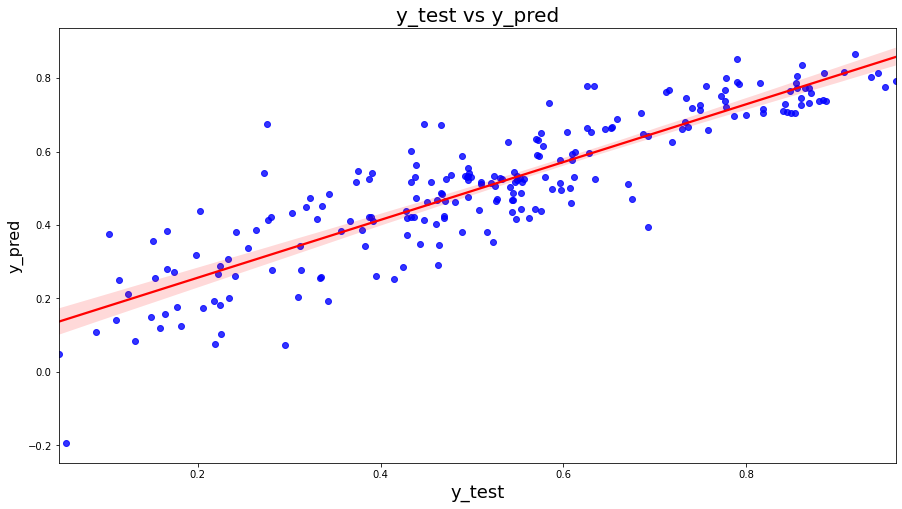

In [195]:
#Regression plot between test vs predicted
plt.figure(figsize=(15,8))
sns.regplot(x=y_test, y=y_pred, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)  
plt.xlabel('y_test', fontsize=18)                   
plt.ylabel('y_pred', fontsize=16)                   
plt.show()

#### Model is meeting the linear regression assumptions:
- Errors terms are normally distributed
- Difference in train and test R square is not high. so, no under/over fitting
- Target predicted and target actual values has linear relationship

#### Conclusion: Top variables affecting the bike rentals as per the given data are 
- yr: The rentals will increase in the coming days
- weathersit_Light Snow: Bike rentals will decrease when it snows. It has a negative relationship with count.
- season_spring: Bike rentals are less in spring season. It has a negative relationship with count.
- windspeed: Bike rentals are less when windspeed is high. It has a negative relationship with count .